# WorldHappiness

Merupakan laporan yang mengukur tingkat kebahagiaan penduduk disuatu negara. Laporan ini pertama kali diterbitkan tahun 2012. Dataset yang digunakan untuk soal ini merupakan tahun 2019 dan untuk soalnya sendiri berasal dari https://github.com/LintangWisesa/Ujian_AnalyticsVisualization_JCDS08.

Import Dataset dan Library

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

file = pd.read_csv('2019.csv')
file

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [2]:
all_columns = file[['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]

mean = all_columns.mean() 
len_data = len(mean)
len_file_data = len(file.columns)

Soal

1. Untuk setiap numerik feature/column (kecuali column Overall Rank), hitunglah:
   - Mean, Median dan Modus
   - Range, Q1, Q3 dan IQR
   - Standard Deviasi & Variance
   - Z-score tiap data point

Jawaban

- Menghitung nilai Mean, Median dan Modus

In [3]:
data_mean = []
for x in range(len_data):
    loc_data_mean = mean[x]
    data_mean.append(loc_data_mean)

median = all_columns.median()    
data_median = []
for x in range(len_data):
    loc_data_median = median[x]
    data_median.append(loc_data_median)
    
data_mode = []
for x in range(2,len_file_data):
    loc_data_mode=file.iloc[:,x]
    mode_value = st.mode(loc_data_mode)
    data_mode.append(mode_value)  
    
dataframe_1a = pd.DataFrame(list(zip(data_mean,data_median,data_mode)),index=['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'],columns =['Mean','Median','Mode'])
dataframe_1a

,Mean,Median,Mode
Score,5.407096,5.3795,5.208
GDP per capita,0.905147,0.9600,0.960
Social support,1.208814,1.2715,1.465
Healthy life expectancy,0.725244,0.7890,0.999
Freedom to make life choices,0.392571,0.4170,0.557
Generosity,0.184846,0.1775,0.153
Perceptions of corruption,0.110603,0.0855,0.078


- Menghitung nilai Range, Q1, Q3 dan IQR

In [4]:
data_range = []
for x in range(2,len_file_data):
    loc_data_range=file.iloc[:,x]
    range_value = max(loc_data_range)-min(loc_data_range)
    data_range.append(range_value)   

data_q1 = []
for x in range(2,len_file_data):
    loc_data_q1=file.iloc[:,x]
    
    q1_value = np.percentile(loc_data_q1, 25)
    data_q1.append(q1_value) 

data_q3 = []
for x in range(2,len_file_data):
    loc_data_q3=file.iloc[:,x]
    q3_value = np.percentile(loc_data_q3, 75)
    data_q3.append(q3_value)     

data_iqr = []
for x in range(2,len_file_data):
    loc_data=file.iloc[:,x]
    q1_value = np.percentile(loc_data, 25)
    q3_value = np.percentile(loc_data, 75)
    iqr_value = q3_value - q1_value
    data_iqr.append(iqr_value)
    
dataframe_1b = pd.DataFrame(list(zip(data_range,data_q1,data_q3,data_iqr)),index=['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'],columns =['Range','Q1','Q3','IQR'])  
dataframe_1b

,Range,Q1,Q3,IQR
Score,4.916,4.54450,6.18450,1.64000
GDP per capita,1.684,0.60275,1.23250,0.62975
Social support,1.624,1.05575,1.45250,0.39675
Healthy life expectancy,1.141,0.54775,0.88175,0.33400
Freedom to make life choices,0.631,0.30800,0.50725,0.19925
Generosity,0.566,0.10875,0.24825,0.13950
Perceptions of corruption,0.453,0.04700,0.14125,0.09425


- Menghitung nilai Standard Deviasi & Variance

In [5]:
data_std = []
for x in range(2,len_file_data):
    loc_data_std=file.iloc[:,x]
    std_value = np.std(loc_data_std)
    data_std.append(std_value)         

data_variance = []
for x in range(2,len_file_data):
    loc_data_variance=file.iloc[:,x]
    variance_value = st.variance(loc_data_variance)
    data_variance.append(variance_value)

dataframe_1c = pd.DataFrame(list(zip(data_std,data_variance)),index=['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'],columns =['StandarDeviasi','Variance']) 
dataframe_1c

,StandarDeviasi,Variance
Score,1.109546,1.239036
GDP per capita,0.397111,0.158714
Social support,0.298231,0.089515
Healthy life expectancy,0.241347,0.058624
Freedom to make life choices,0.142829,0.020532
Generosity,0.094949,0.009073
Perceptions of corruption,0.094234,0.008937


- Menghitung nilai Z-Score tiap data point

In [6]:
z_score = all_columns.apply(stats.zscore)
z_score

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2.128711,1.095042,1.268098,1.080422,1.424282,-0.335404,2.996757
1,1.976397,1.203324,1.221154,1.121857,1.396277,0.707265,3.177158
2,1.934938,1.467734,1.251332,1.254446,1.473292,0.907373,2.444941
3,1.880862,1.195769,1.392163,1.246159,1.389276,1.781530,0.078500
4,1.875454,1.236060,1.050146,1.134287,1.151229,1.444506,1.988632
...,...,...,...,...,...,...,...
151,-1.868418,-1.375303,-1.669224,-0.460929,1.137227,0.338645,3.187770
152,-1.961248,-1.080675,-1.085783,-0.937421,0.171040,0.960033,0.386244
153,-1.986484,-1.397967,-2.319726,-1.509213,-2.748526,-0.282744,-0.908401
154,-2.094636,-2.213861,-4.053282,-2.569928,-1.173221,0.528221,-0.802283


Soal

2. Untuk setiap numerik feature/column (kecuali column Overall Rank), carilah data Outlier-nya      berdasarkan:
   - IQR method
   - Z-score method

Jawaban

- Mencari data Outlier berdasarkan IQR method untuk setiap fitur/kolom

In [7]:
for x in range(0,len_data):
    q1 = dataframe_1b.iloc[x,1]
    q3 = dataframe_1b.iloc[x,2]
    iqr = dataframe_1b.iloc[x,3]
    min_iqr_score = q1 - 1.5 * iqr
    max_iqr_score = q3 + 1.5 * iqr
    loc_data=file.iloc[:,x+2]
    loc_column = file.columns[x+2]
    outlier_iqr =[]
    for y in loc_data:
        if ((y > max_iqr_score) or (y < min_iqr_score)):
            outlier_iqr.append(y)
    print(loc_column,outlier_iqr)

Score []
GDP per capita []
Social support [0.437, 0.447, 0.378, 0.0]
Healthy life expectancy [0.0]
Freedom to make life choices [0.0]
Generosity [0.498, 0.566]
Perceptions of corruption [0.393, 0.41, 0.341, 0.298, 0.343, 0.373, 0.38, 0.308, 0.29, 0.316, 0.31, 0.453, 0.287, 0.411]


- Mencari data Outlier berdasarkan Z-Score method untuk setiap fitur/kolom

In [8]:
for x in range(2,len_file_data):
    mean = dataframe_1a.iloc[x-2,0]
    std = dataframe_1c.iloc[x-2,0]
    loc_data = file.iloc[:,x]
    loc_column = file.columns[x]
    threshold = 3
    outlier_z_score = []
    for y in loc_data:
        var = (y-mean)/std
        if var > threshold:
            outlier_z_score.append(y)
    print(loc_column,outlier_z_score)

Score []
GDP per capita []
Social support []
Healthy life expectancy []
Freedom to make life choices []
Generosity [0.498, 0.566]
Perceptions of corruption [0.41, 0.453, 0.411]


Soal

3. Tampilkan sebaran masing-masing numerik feature/column (kecuali column Overall Rank) dalam bentuk boxplot dan histogram!

Jawaban

- Menampilkan masing - masing numerik fitur/kolom dalam bentuk Boxplot

Score


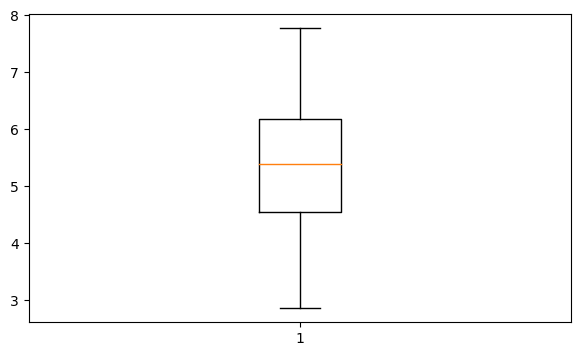

GDP per capita


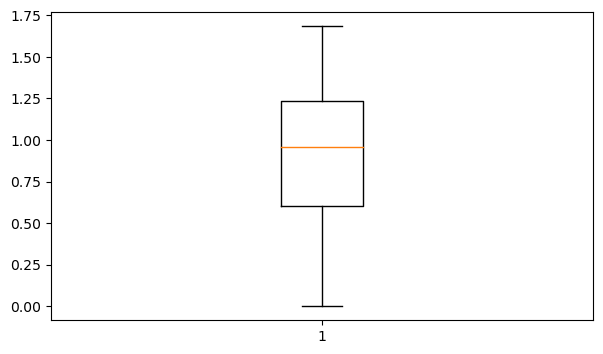

Social support


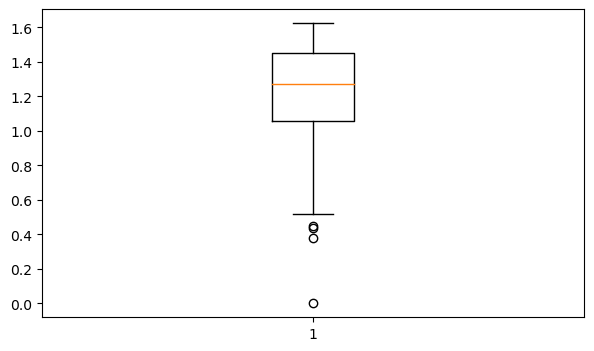

Healthy life expectancy


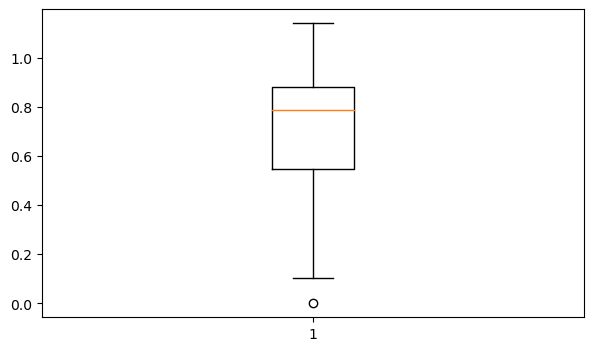

Freedom to make life choices


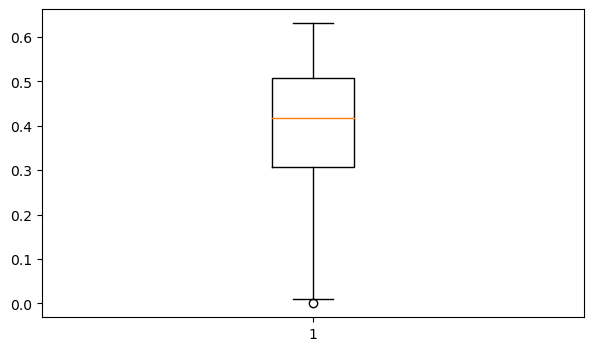

Generosity


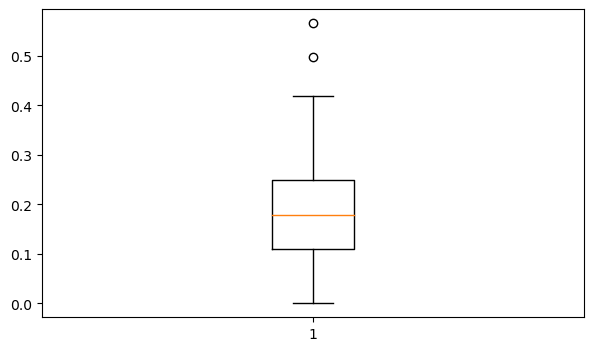

Perceptions of corruption


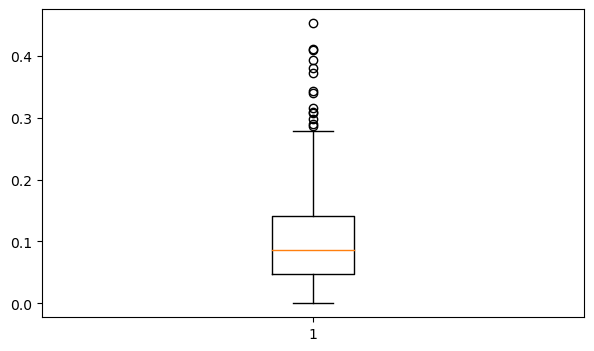

In [9]:
for x in range(2,len_file_data):
    loc_data = file.iloc[:,x]
    head = file.columns.values[x]
    fig = plt.figure(figsize =(7, 4))
    plt.boxplot(loc_data)
    print(head)
    plt.show()

- Menampilkan masing - masing numerik fitur/kolom dalam bentuk Histogram

Score


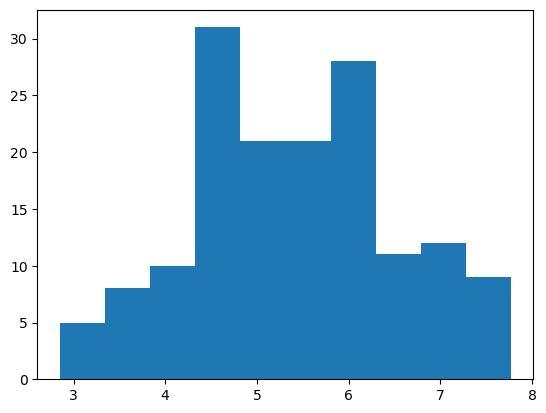

GDP per capita


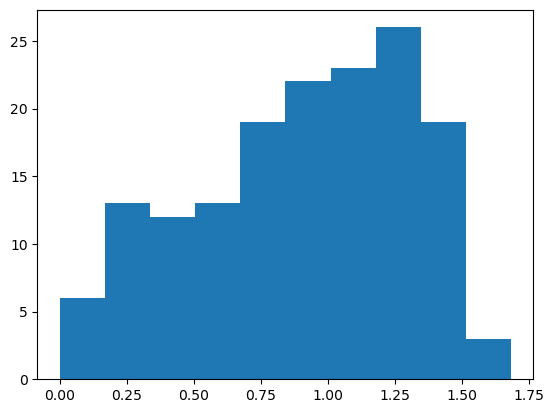

Social support


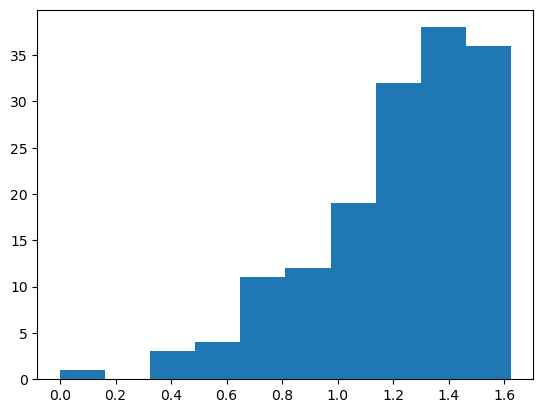

Healthy life expectancy


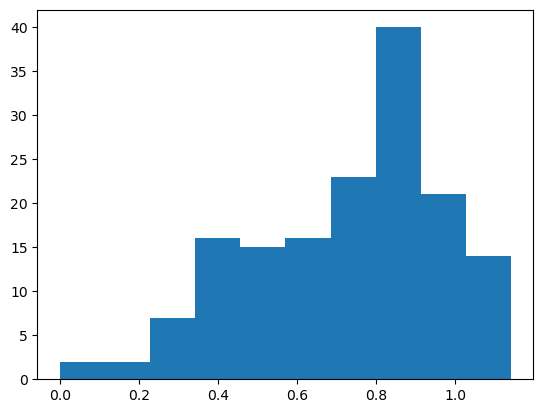

Freedom to make life choices


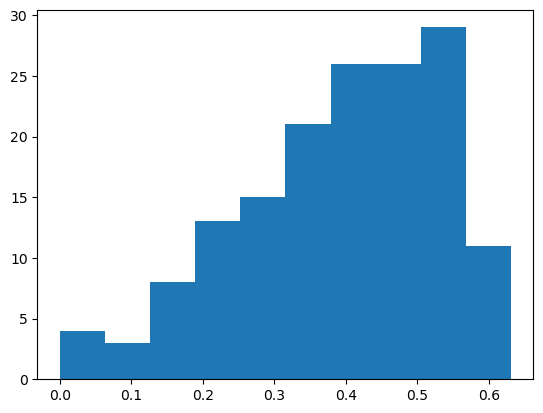

Generosity


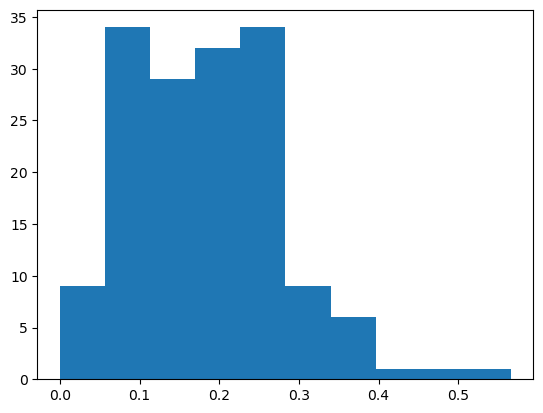

Perceptions of corruption


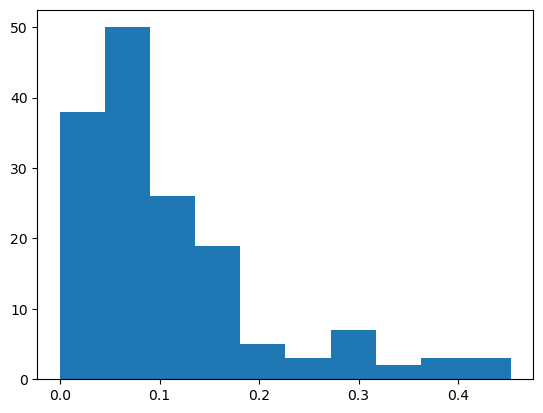

In [10]:
for x in range(2,len_file_data):
    loc_data = file.iloc[:,x]
    head = file.columns.values[x]
    plt.hist(loc_data)
    print(head)
    plt.show() 

Soal

4. Di antara semua numerik feature/column (kecuali column Overall Rank), feature/column mana saja yang sangat mempengaruhi happiness score suatu negara? Buktikan dengan menghitung nilai:
   - Covariance
   - Pearson Correlation
   - Spearman Correlation
   - Kendall Correlation

Jawaban

Nilai Threshold yang digunakan merupakan nilai yang mendekati 1

- Fitur/kolom yang sangat mempengaruhi happiness score berdasarkan nilai Covariance

In [20]:
covariance = all_columns.cov()
row_col = []
data_all = []
data_all2 = []

for x in range(len_data):
    col = file.columns[x+2]
    for y in range(len_data):
        data = covariance.iloc[x,y]
        row = covariance.index[y]
        data_all.append(data)
        data_all2.append(data)
        row_col.extend([[col,row]])  
        
threshold = []
for x in range(len(data_all)):
    data_all2.sort(reverse=True)
    threshold_find = data_all2[x]
    if threshold_find < 1:
        threshold.append(threshold_find)
        break
print('\nnilai threshold = ',threshold)
for x in range(len(data_all)):
    loc = data_all[x]
    threshold_selecteds = threshold[0]
    if loc == threshold_selecteds:
        print('kolom sangat mempengaruhi happiness score berdasarkan nilai Covariance',row_col[x])  
        
row_temp = []
col_temp = row_temp
data_temp = []
for x in range(len_data):
    row = file.columns[x+2]
    row_temp.append(row)
    data_raw = []
    for y in range(len_data):
        data = covariance.iloc[x,y]
        data_raw.append(data)
    data_temp.append(data_raw)
dataframe_covariance = pd.DataFrame(list(zip(data_temp[0],data_temp[1],data_temp[2],data_temp[3],data_temp[4],data_temp[5],data_temp[6])),columns=col_temp,index=row_temp)
dataframe_covariance


nilai threshold =  [0.3520515083126551]
kolom sangat mempengaruhi happiness score berdasarkan nilai Covariance ['Score', 'GDP per capita']
kolom sangat mempengaruhi happiness score berdasarkan nilai Covariance ['GDP per capita', 'Score']


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.239036,0.352052,0.258788,0.210189,0.090394,0.008040,0.040579
GDP per capita,0.352052,0.158714,0.089981,0.080588,0.021640,-0.003023,0.011258
Social support,0.258788,0.089981,0.089515,0.052086,0.019178,-0.001372,0.005145
Healthy life expectancy,0.210189,0.080588,0.052086,0.058624,0.013544,-0.000681,0.006759
Freedom to make life choices,0.090394,0.021640,0.019178,0.013544,0.020532,0.003682,0.005945
Generosity,0.008040,-0.003023,-0.001372,-0.000681,0.003682,0.009073,0.002941
Perceptions of corruption,0.040579,0.011258,0.005145,0.006759,0.005945,0.002941,0.008937


- Fitur/kolom yang sangat mempengaruhi happiness score berdasarkan nilai Pearson Correlation

In [23]:
pearson_correllation = all_columns.corr()
row_col = []
data_all = []
data_all2 = []

for x in range(len_data):
    col = file.columns[x+2]
    for y in range(len_data):
        data = pearson_correllation.iloc[x,y]
        row = pearson_correllation.index[y]
        data_all.append(data)
        data_all2.append(data)
        row_col.extend([[col,row]])  
        
threshold = []
for x in range(len(data_all)):
    data_all2.sort(reverse=True)
    threshold_find = data_all2[x]
    if threshold_find < 1:
        threshold.append(threshold_find)
        break
print('\nnilai threshold = ',threshold)
for x in range(len(data_all)):
    loc = data_all[x]
    threshold_selecteds = threshold[0]
    if loc == threshold_selecteds:
        print('kolom sangat mempengaruhi happiness score berdasarkan nilai Pearson Correlation',row_col[x])  
        
row_temp = []
col_temp = row_temp
data_temp = []
for x in range(len_data):
    row = file.columns[x+2]
    row_temp.append(row)
    data_raw = []
    for y in range(len_data):
        data = pearson_correllation.iloc[x,y]
        data_raw.append(data)
    data_temp.append(data_raw)
pearson_correllation = pd.DataFrame(list(zip(data_temp[0],data_temp[1],data_temp[2],data_temp[3],data_temp[4],data_temp[5],data_temp[6])),columns=col_temp,index=row_temp)
pearson_correllation


nilai threshold =  [0.8354621150416075]
kolom sangat mempengaruhi happiness score berdasarkan nilai Pearson Correlation ['GDP per capita', 'Healthy life expectancy']
kolom sangat mempengaruhi happiness score berdasarkan nilai Pearson Correlation ['Healthy life expectancy', 'GDP per capita']


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


- Fitur/kolom yang sangat mempengaruhi happiness score berdasarkan nilai Spearman Correlation

In [25]:
spearman_correlation = all_columns.corr(method='spearman')
row_col = []
data_all = []
data_all2 = []

for x in range(len_data):
    col = file.columns[x+2]
    for y in range(len_data):
        data = spearman_correlation.iloc[x,y]
        row = spearman_correlation.index[y]
        data_all.append(data)
        data_all2.append(data)
        row_col.extend([[col,row]])  
        
threshold = []
for x in range(len(data_all)):
    data_all2.sort(reverse=True)
    threshold_find = data_all2[x]
    if threshold_find < 1:
        threshold.append(threshold_find)
        break
print('\nnilai threshold = ',threshold)
for x in range(len(data_all)):
    loc = data_all[x]
    threshold_selecteds = threshold[0]
    if loc == threshold_selecteds:
        print('kolom sangat mempengaruhi happiness score berdasarkan nilai Spearman Correlation',row_col[x])  
        
row_temp = []
col_temp = row_temp
data_temp = []
for x in range(len_data):
    row = file.columns[x+2]
    row_temp.append(row)
    data_raw = []
    for y in range(len_data):
        data = spearman_correlation.iloc[x,y]
        data_raw.append(data)
    data_temp.append(data_raw)
spearman_correlation = pd.DataFrame(list(zip(data_temp[0],data_temp[1],data_temp[2],data_temp[3],data_temp[4],data_temp[5],data_temp[6])),columns=col_temp,index=row_temp)
spearman_correlation


nilai threshold =  [0.8515128105565349]
kolom sangat mempengaruhi happiness score berdasarkan nilai Spearman Correlation ['GDP per capita', 'Healthy life expectancy']
kolom sangat mempengaruhi happiness score berdasarkan nilai Spearman Correlation ['Healthy life expectancy', 'GDP per capita']


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.814483,0.816181,0.807275,0.551974,0.070483,0.217348
GDP per capita,0.814483,1.000000,0.768539,0.851513,0.393426,-0.041304,0.223203
Social support,0.816181,0.768539,1.000000,0.725997,0.449491,0.007695,0.114017
Healthy life expectancy,0.807275,0.851513,0.725997,1.000000,0.412906,-0.006773,0.165309
Freedom to make life choices,0.551974,0.393426,0.449491,0.412906,1.000000,0.324146,0.403586
Generosity,0.070483,-0.041304,0.007695,-0.006773,0.324146,1.000000,0.286171
Perceptions of corruption,0.217348,0.223203,0.114017,0.165309,0.403586,0.286171,1.000000


- Fitur/kolom yang sangat mempengaruhi happiness score berdasarkan nilai Kendall Correlation

In [26]:
kendall_correlation = all_columns.corr(method='kendall')
row_col = []
data_all = []
data_all2 = []

for x in range(len_data):
    col = file.columns[x+2]
    for y in range(len_data):
        data = kendall_correlation.iloc[x,y]
        row = kendall_correlation.index[y]
        data_all.append(data)
        data_all2.append(data)
        row_col.extend([[col,row]])  
        
threshold = []
for x in range(len(data_all)):
    data_all2.sort(reverse=True)
    threshold_find = data_all2[x]
    if threshold_find < 1:
        threshold.append(threshold_find)
        break
print('\nnilai threshold = ',threshold)
for x in range(len(data_all)):
    loc = data_all[x]
    threshold_selecteds = threshold[0]
    if loc == threshold_selecteds:
        print('kolom sangat mempengaruhi happiness score berdasarkan nilai Kendall Correlation',row_col[x])  
        
row_temp = []
col_temp = row_temp
data_temp = []
for x in range(len_data):
    row = file.columns[x+2]
    row_temp.append(row)
    data_raw = []
    for y in range(len_data):
        data = kendall_correlation.iloc[x,y]
        data_raw.append(data)
    data_temp.append(data_raw)
kendall_correlation = pd.DataFrame(list(zip(data_temp[0],data_temp[1],data_temp[2],data_temp[3],data_temp[4],data_temp[5],data_temp[6])),columns=col_temp,index=row_temp)
kendall_correlation


nilai threshold =  [0.6556925207295201]
kolom sangat mempengaruhi happiness score berdasarkan nilai Kendall Correlation ['GDP per capita', 'Healthy life expectancy']
kolom sangat mempengaruhi happiness score berdasarkan nilai Kendall Correlation ['Healthy life expectancy', 'GDP per capita']


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.619993,0.616792,0.602613,0.394203,0.043759,0.140974
GDP per capita,0.619993,1.000000,0.569193,0.655693,0.270837,-0.042451,0.135225
Social support,0.616792,0.569193,1.000000,0.529983,0.319566,0.000746,0.070270
Healthy life expectancy,0.602613,0.655693,0.529983,1.000000,0.288418,-0.004901,0.106295
Freedom to make life choices,0.394203,0.270837,0.319566,0.288418,1.000000,0.226187,0.277792
Generosity,0.043759,-0.042451,0.000746,-0.004901,0.226187,1.000000,0.188933
Perceptions of corruption,0.140974,0.135225,0.070270,0.106295,0.277792,0.188933,1.000000


Soal

5. Visualisasikan dalam bentuk bar chart data berikut:
   - 10 Negara dengan GDP per capita tertinggi.
   - 10 Negara dengan Healthy life expectancy tertinggi.
   - 10 Negara dengan Perceptions of corruption tertinggi.

Jawaban

- Visualisasi 10 Negara dengan GDP per capita tertinggi

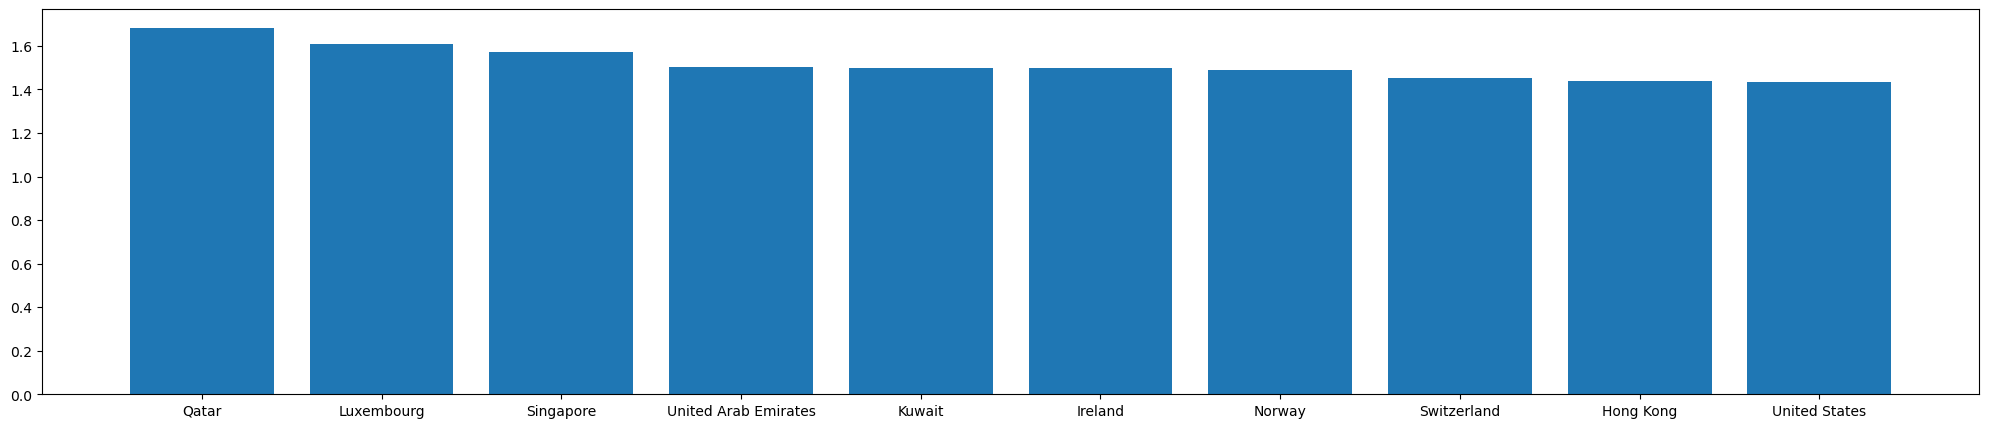

In [27]:
data_gdp_per_capita = file['GDP per capita']
sort_data_gdp_per_capita = data_gdp_per_capita.sort_values(ascending=False)
row = sort_data_gdp_per_capita.index.tolist()
row_index = []
high_gdp_per_capita_value = []
for x in range(10):
    loc_data = sort_data_gdp_per_capita.iloc[x]
    loc_row = row[x]
    row_index.append(loc_row)
    high_gdp_per_capita_value.append(loc_data)
column = []
for x in row_index:
    var = file.iloc[x,1]
    column.append(var)
highest_10_gdp_per_capita_value = pd.DataFrame(high_gdp_per_capita_value,index=column,columns=['Value'])   
fig = plt.figure(figsize =(25, 5))
plt.bar(column, high_gdp_per_capita_value)
plt.show()

- Visualisasi 10 Negara dengan Healthy life expectancy tertinggi

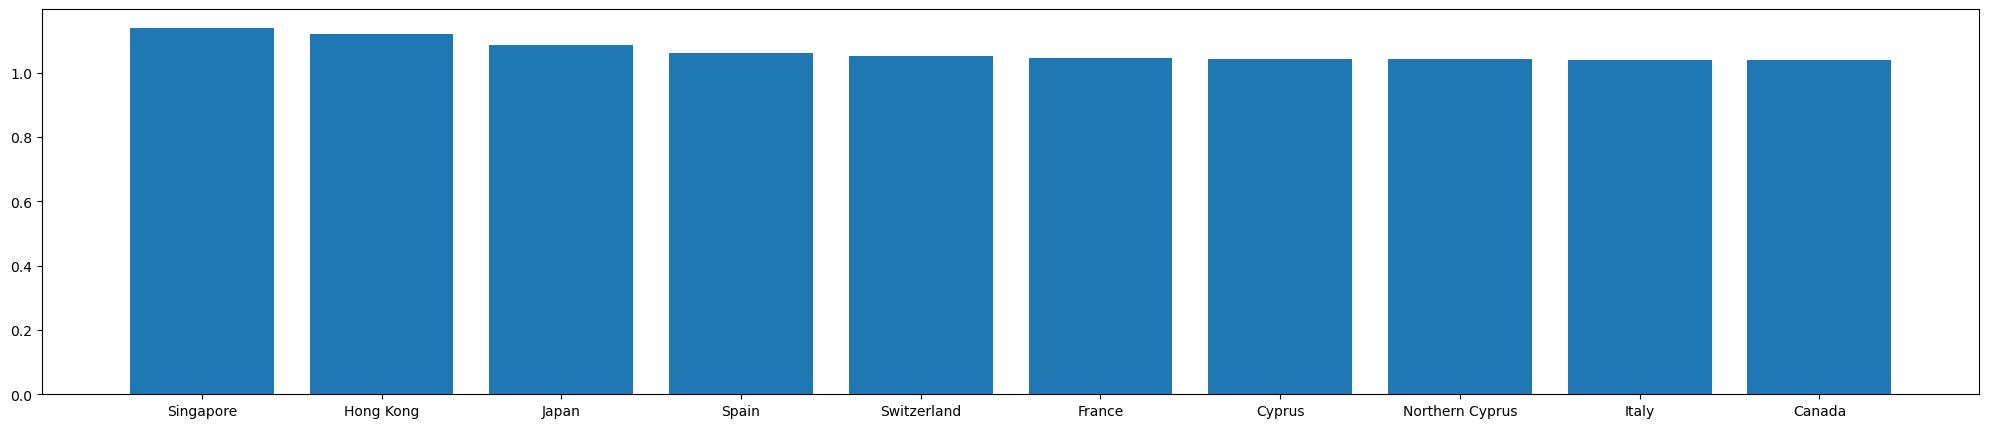

In [28]:
data_health_life_expectancy = file['Healthy life expectancy']
sort_data_health_life_expectancy = data_health_life_expectancy.sort_values(ascending=False)
row = sort_data_health_life_expectancy.index.tolist()
row_index = []
high_data_health_life_expectancy_value = []
for x in range(10):
    loc_data = sort_data_health_life_expectancy.iloc[x]
    loc_row = row[x]
    row_index.append(loc_row)
    high_data_health_life_expectancy_value.append(loc_data)
column = []
for x in row_index:
    var = file.iloc[x,1]
    column.append(var)
fig = plt.figure(figsize =(25, 5))
plt.bar(column, high_data_health_life_expectancy_value)
plt.show()

- Visualisasi 10 Negara dengan Perceptions of corruption tertinggi

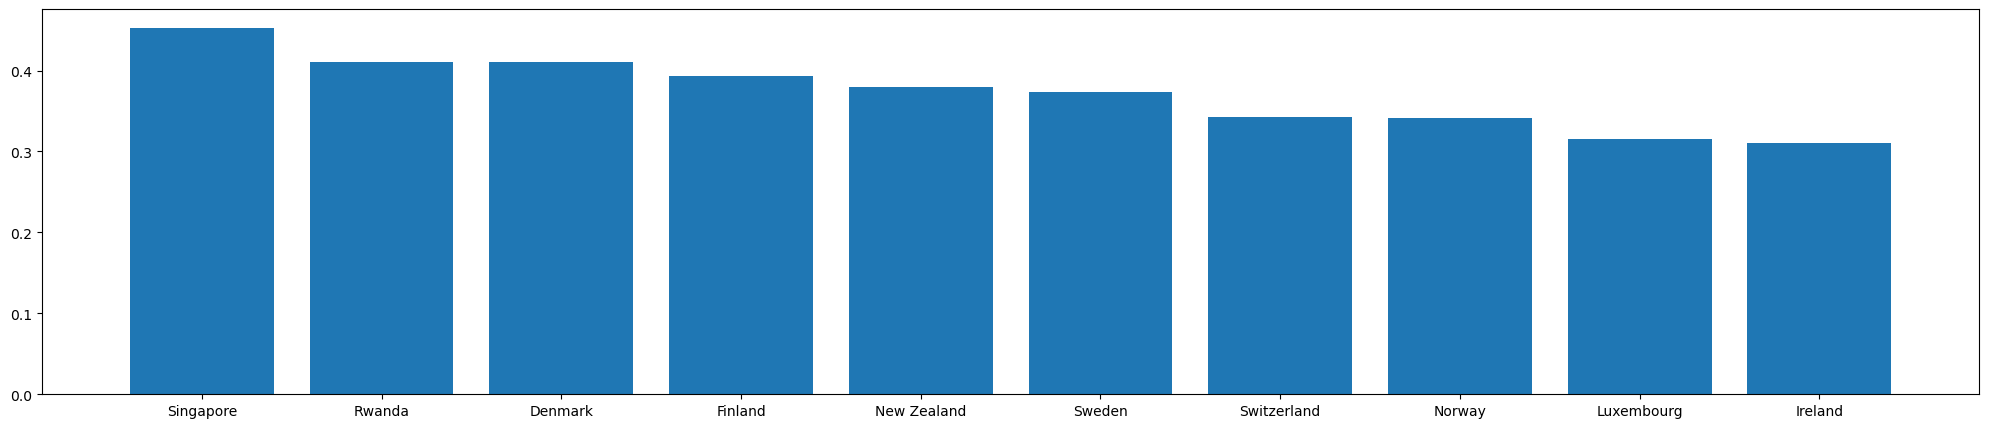

In [29]:
data_perception_of_corruption = file['Perceptions of corruption']
sort_perception_of_corruption = data_perception_of_corruption.sort_values(ascending=False)
row = sort_perception_of_corruption.index.tolist()
row_index = []
high_perception_of_corruption_value = []
for x in range(10):
    loc_data = sort_perception_of_corruption.iloc[x]
    loc_row = row[x]
    row_index.append(loc_row)
    high_perception_of_corruption_value.append(loc_data)
column = []
for x in row_index:
    var = file.iloc[x,1]
    column.append(var)
fig = plt.figure(figsize =(25, 5))
plt.bar(column, high_perception_of_corruption_value)
plt.show()